COMP 3625 - ASG2

In [120]:
import os
import tarfile 
import urllib

import pandas as pd
pd.plotting.register_matplotlib_converters()
from pandas.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# tell matplotlib to use Jupyter to plot inline. 
%matplotlib inline 
import matplotlib.pyplot as plt 



Read in the file:

In [121]:
#dir = "C:/Users/janel/OneDrive/Desktop/"
dir = input("Enter file path: ")
data_url = dir + "globalterrorismdb_0718dist.csv"
data = pd.read_csv(data_url)
data.head()

C:\Users\janel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN




Exploring the data:

In [122]:
print("The global terrorism dataset has {} rows and {} columns.".format(data.shape[0], data.shape[1]))

for col in data.columns:
    print(col)

The global terrorism dataset has 181691 rows and 135 columns.
eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptyp

Dropping columns that have 80%-100% null rows.

In [123]:
#data.drop(columns=["resolution","alternative_txt","attacktype2","attacktype2_txt","weapsubtype3_txt","weaptype4"])

# 80% data minimum
limitPer = len(data) * .80
data_trimmed = data.dropna(thresh=limitPer, axis=1)

After dropping unwanted rows:

In [124]:
print("The global terrorism dataset has {} rows and {} columns.".format(data_trimmed.shape[0], data_trimmed.shape[1]))

for col in data_trimmed.columns: 
    print(col)

The global terrorism dataset has 181691 rows and 47 columns.
eventid
iyear
imonth
iday
extended
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
crit1
crit2
crit3
doubtterr
multiple
success
suicide
attacktype1
attacktype1_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
target1
natlty1
natlty1_txt
gname
guncertain1
individual
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
nkill
nwound
property
ishostkid
dbsource
INT_LOG
INT_IDEO
INT_MISC
INT_ANY


get region numbers and region names, which region has the most attacks using region name and region id given. 

This data set has 12 regions, each region has been given a region id:


Region ID       Region Name                     Number of attacks in each Region
1               North America                   3456
2               Central America & Caribbean     10344
3               South America                   18978
4               East Asia                       802
5               Southeast Asia                  12485
6               South Asia                      44974
7               Central Asia                    563
8               Western Europe                  16639
9               Eastern Europe                  5144
10              Middle East & North Africa      50474
11              Sub-Saharan Africa              17550
12              Australasia & Oceania           282


<AxesSubplot:>

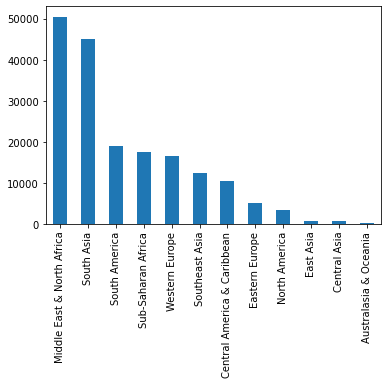

In [125]:
# displays highest to lowest occurances of each region 
region_text = data["region_txt"].value_counts()
region_id = data["region"].value_counts()
# print(region_text)
# print(region_id)

#graph to show amount of attacks in each region 
region_text.plot(kind='bar')

most attacks based on years

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64


<AxesSubplot:>

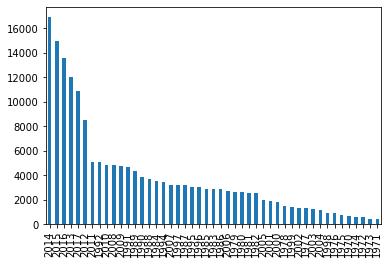

In [126]:
# displays highest to lowest occurances of attacks per year
years = data["iyear"].value_counts()
print(years)
years.plot(kind='bar')

most attacks based on days

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: iday, dtype: int64


<AxesSubplot:>

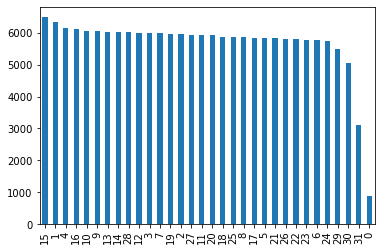

In [127]:
days = data["iday"].value_counts()
print(days)
days.plot(kind='bar')

most attacks based on days

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64


<AxesSubplot:>

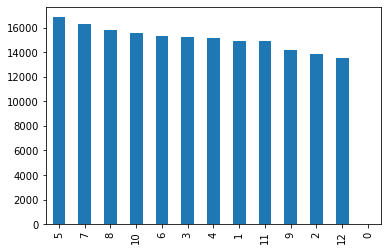

In [128]:
months = data["imonth"].value_counts()
print(months)
months.plot(kind='bar')


In [129]:
summary = data['summary']
print(summary)

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
181686    12/31/2017: Assailants opened fire on a Somali...
181687    12/31/2017: Assailants launched mortars at the...
181688    12/31/2017: Assailants set fire to houses in K...
181689    12/31/2017: Assailants threw a grenade at a Fo...
181690    12/31/2017: An explosive device was discovered...
Name: summary, Length: 181691, dtype: object
